<a href="https://colab.research.google.com/github/busramomo10/test-one/blob/main/cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
df_csv = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")
print("Data loaded from CSV:")
print(df_csv)

Data loaded from CSV:
     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                

In [11]:

print("\nFirst 3 rows of df_csv:")
print(df_csv.head(3))
print("\nInfo about df_csv:")
df_csv.info()
print("\nDescriptive statistics for df_csv:")
print(df_csv.describe())


First 3 rows of df_csv:
   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:C

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

if 'df_csv' not in globals():
    print("Loading df_csv...")
    df_csv = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv545187 ")

df_csv_cleaned = df_csv.replace('?', np.nan)

print("DataFrame before imputation (showing columns with NaNs):")
# Select columns with missing values to display
cols_with_missing = df_csv_cleaned.columns[df_csv_cleaned.isnull().any()].tolist()
if cols_with_missing:
    display(df_csv_cleaned[cols_with_missing].head())
else:
    print("No columns with missing values found after cleaning.")


for col in cols_with_missing:
    df_csv_cleaned[col] = pd.to_numeric(df_csv_cleaned[col], errors='coerce')

numerical_cols_with_missing = df_csv_cleaned[cols_with_missing].select_dtypes(include=np.number).columns.tolist()

# Impute numerical missing values with the mean
if numerical_cols_with_missing:
    imputer_mean = SimpleImputer(strategy='mean')
    # Need to use .values to avoid pandas FutureWarning and ensure correct reshaping for SimpleImputer
    df_csv_cleaned[numerical_cols_with_missing] = imputer_mean.fit_transform(df_csv_cleaned[numerical_cols_with_missing])
    print("\nDataFrame after mean imputation for numerical columns:")
    display(df_csv_cleaned[numerical_cols_with_missing].head())
else:
    print("\nNo numerical columns with missing values to impute with mean.")

cols_with_missing_after_num_imputation = df_csv_cleaned.columns[df_csv_cleaned.isnull().any()].tolist()
categorical_cols_with_missing = df_csv_cleaned[cols_with_missing_after_num_imputation].select_dtypes(exclude=np.number).columns.tolist()


# Impute categorical missing values with the most frequent value (mode)
if categorical_cols_with_missing:
    imputer_mode = SimpleImputer(strategy='most_frequent')
     # Need to use .values to avoid pandas FutureWarning and ensure correct reshaping for SimpleImputer
    df_csv_cleaned[categorical_cols_with_missing] = imputer_mode.fit_transform(df_csv_cleaned[categorical_cols_with_missing])
    print("\nDataFrame after mode imputation for categorical columns:")
    display(df_csv_cleaned[categorical_cols_with_missing].head())
else:
     print("\nNo categorical columns with missing values to impute with mode.")

print("\nInfo about DataFrame after imputation:")
df_csv_cleaned.info()

DataFrame before imputation (showing columns with NaNs):


,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN



DataFrame after mean imputation for numerical columns:


,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901
1,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901
2,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901
3,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901
4,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901



No categorical columns with missing values to impute with mode.

Info about DataFrame after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (

In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numerical_cols = df_csv_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
df_csv_scaled = df_csv_cleaned.copy()
df_csv_scaled[numerical_cols] = scaler.fit_transform(df_csv_scaled[numerical_cols])

print("DataFrame after Min-Max Scaling (first 5 rows):")
display(df_csv_scaled.head())
print("\nDescriptive statistics after scaling:")
display(df_csv_scaled.describe())

DataFrame after Min-Max Scaling (first 5 rows):


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.070423,0.111111,0.227273,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.244802,0.229376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028169,0.000000,0.181818,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.244802,0.229376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.295775,0.000000,0.317968,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.244802,0.229376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.549296,0.148148,0.272727,0.363636,1.0,1.0,1.0,1.0,0.1,0.0,...,0.244802,0.229376,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.464789,0.074074,0.500000,0.363636,0.0,0.0,0.0,1.0,0.5,0.0,...,0.244802,0.229376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Descriptive statistics after scaling:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,0.194655,0.056579,0.317968,0.206869,0.145562,0.032965,0.012247,0.641333,0.075214,0.112011,...,0.244802,0.229376,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,0.119689,0.060825,0.126904,0.127211,0.350189,0.109673,0.059720,0.448671,0.117303,0.293260,...,0.080228,0.078326,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098592,0.037037,0.227273,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.244802,0.229376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.169014,0.037037,0.318182,0.181818,0.000000,0.000000,0.000000,1.000000,0.033333,0.000000,...,0.244802,0.229376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.267606,0.074074,0.363636,0.272727,0.000000,0.000000,0.000000,1.000000,0.075214,0.000000,...,0.244802,0.229376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_cols = df_csv_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Z-score scaling to the numerical columns
df_csv_standardized = df_csv_cleaned.copy() # Create a copy to avoid modifying the original cleaned DataFrame
df_csv_standardized[numerical_cols] = scaler.fit_transform(df_csv_standardized[numerical_cols])

print("DataFrame after Z-score Scaling (first 5 rows):")
display(df_csv_standardized.head())
print("\nDescriptive statistics after scaling:")
display(df_csv_standardized.describe())

DataFrame after Z-score Scaling (first 5 rows):


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,-1.038563,0.897061,-0.715096,-0.912086,-0.415910,-0.300756,-0.205194,-1.430242,-0.641569,-0.382174,...,5.274840e-16,5.402927e-16,-0.146385,-0.10296,-0.146385,-0.169638,-0.206222,-0.307226,-0.232495,-0.261712
1,-1.391796,-0.930747,-1.073486,-0.912086,-0.415910,-0.300756,-0.205194,-1.430242,-0.641569,-0.382174,...,5.274840e-16,5.402927e-16,-0.146385,-0.10296,-0.146385,-0.169638,-0.206222,-0.307226,-0.232495,-0.261712
2,0.845342,-0.930747,0.000000,-0.912086,-0.415910,-0.300756,-0.205194,-1.430242,-0.641569,-0.382174,...,5.274840e-16,5.402927e-16,-0.146385,-0.10296,-0.146385,-0.169638,-0.206222,-0.307226,-0.232495,-0.261712
3,2.964736,1.506331,-0.356706,1.233055,2.441357,8.822613,16.549250,0.799865,0.211423,-0.382174,...,5.274840e-16,5.402927e-16,6.831301,-0.10296,6.831301,-0.169638,-0.206222,-0.307226,-0.232495,-0.261712
4,2.258271,0.287792,1.435245,1.233055,-0.415910,-0.300756,-0.205194,0.799865,3.623392,-0.382174,...,5.274840e-16,5.402927e-16,-0.146385,-0.10296,-0.146385,-0.169638,-0.206222,-0.307226,-0.232495,-0.261712



Descriptive statistics after scaling:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,8.580000e+02,8.580000e+02,8.580000e+02,858.000000,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,...,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02
mean,-9.109522e-17,-3.312554e-17,-5.382900e-16,0.000000,4.658278e-17,-2.898484e-17,8.281384e-18,1.076580e-16,-3.312554e-17,-4.140692e-17,...,5.569231e-16,5.465713e-16,-5.796969e-17,2.070346e-18,-6.211038e-17,2.070346e-17,2.484415e-17,5.382900e-17,7.039176e-17,6.107521e-17
std,1.000583e+00,1.000583e+00,1.000583e+00,1.000583,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,...,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00
min,-1.627284e+00,-9.307471e-01,-2.507046e+00,-1.627133,-4.159099e-01,-3.007559e-01,-2.051939e-01,-1.430242e+00,-6.415694e-01,-3.821736e-01,...,-3.053118e+00,-2.930196e+00,-1.463850e-01,-1.029597e-01,-1.463850e-01,-1.696378e-01,-2.062216e-01,-3.072259e-01,-2.324953e-01,-2.617120e-01
25%,-8.030752e-01,-3.214775e-01,-7.150957e-01,-0.912086,-4.159099e-01,-3.007559e-01,-2.051939e-01,-1.430242e+00,-6.415694e-01,-3.821736e-01,...,5.274840e-16,5.402927e-16,-1.463850e-01,-1.029597e-01,-1.463850e-01,-1.696378e-01,-2.062216e-01,-3.072259e-01,-2.324953e-01,-2.617120e-01
50%,-2.143546e-01,-3.214775e-01,1.684560e-03,-0.197039,-4.159099e-01,-3.007559e-01,-2.051939e-01,7.998649e-01,-3.572386e-01,-3.821736e-01,...,5.274840e-16,5.402927e-16,-1.463850e-01,-1.029597e-01,-1.463850e-01,-1.696378e-01,-2.062216e-01,-3.072259e-01,-2.324953e-01,-2.617120e-01
75%,6.098541e-01,2.877920e-01,3.600747e-01,0.518008,-4.159099e-01,-3.007559e-01,-2.051939e-01,7.998649e-01,0.000000e+00,-3.821736e-01,...,5.274840e-16,5.402927e-16,-1.463850e-01,-1.029597e-01,-1.463850e-01,-1.696378e-01,-2.062216e-01,-3.072259e-01,-2.324953e-01,-2.617120e-01
max,6.732547e+00,1.551953e+01,5.377536e+00,6.238384,2.441357e+00,8.822613e+00,1.654925e+01,7.998649e-01,7.888354e+00,3.029761e+00,...,9.418659e+00,9.844430e+00,6.831301e+00,9.712535e+00,6.831301e+00,5.894913e+00,4.849153e+00,3.254934e+00,4.301163e+00,3.820995e+00


In [15]:
import pandas as pd

X = df_csv_cleaned.drop('Biopsy', axis=1)
y = df_csv_cleaned['Biopsy']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=42, test_size= 0.2
)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

-0.09369494415705337

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


models = [RandomForestClassifier(random_state=42), DecisionTreeClassifier(random_state=42), LogisticRegression(max_iter=1000, random_state=42)] # Added random_state for reproducibility and max_iter for LogisticRegression

scores = {}
for model in models:
    model.fit(X_train,y_train)
    name = type(model).__name__

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred) * 100
    scores[name] = score

print("Accuracy scores for classification models:")
for name, score in scores.items():
    print(f"{name}: {score:.2f}%")

Accuracy scores for classification models:
RandomForestClassifier: 93.60%
DecisionTreeClassifier: 95.35%
LogisticRegression: 94.77%


/tmp/ipython-input-3961704912.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


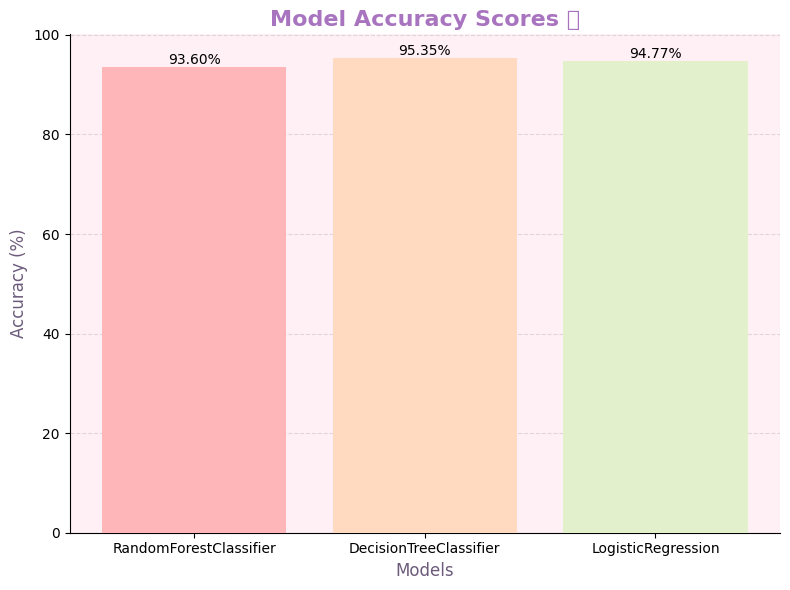

In [20]:
import matplotlib.pyplot as plt

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(scores.keys(), scores.values(), color=cute_colors[:len(scores)])

# Add rounded edges to bars (optional, but adds to the cute style)
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('Model Accuracy Scores 📊', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('Accuracy (%)', fontsize=12, color='#6C5B7B')

# Add the percentage value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment


# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()